In [23]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

df.head()


Saving Student Emotion Feedback - Sheet1.csv to Student Emotion Feedback - Sheet1.csv


,feedback_id,feedback_text,emotion,intensity,topic,sentiment
0,1,The lectures are clear but sometimes hard to f...,Confused,Medium,Lecture Pace,Neutral
1,2,I feel confident after finishing the practical...,Confident,High,Practical Sessions,Positive
2,3,The syllabus is stressful to complete in the g...,Stressed,High,Course Content,Negative
3,4,Assignments motivate me to understand the conc...,Motivated,Medium,Assignments,Positive
4,5,I feel anxious before exams due to unclear ins...,Anxious,High,Exam Difficulty,Negative


In [33]:
pd.set_option('display.max_colwidth', None)


In [24]:
df.info()

df.isnull().sum()

print("Emotions:", df['emotion'].unique())
print("Intensity levels:", df['intensity'].unique())
print("Topics:", df['topic'].unique())
print("Sentiment:", df['sentiment'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   feedback_id    100 non-null    int64 
 1   feedback_text  100 non-null    object
 2   emotion        100 non-null    object
 3   intensity      100 non-null    object
 4   topic          100 non-null    object
 5   sentiment      100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB
Emotions: ['Confused' 'Confident' 'Stressed' 'Motivated' 'Anxious' 'Happy'
 'Frustrated' 'Uncertain' 'Satisfied' 'Overwhelmed' 'Bored' 'Dissatisfied']
Intensity levels: ['Medium' 'High']
Topics: ['Lecture Pace' 'Practical Sessions' 'Course Content' 'Assignments'
 'Exam Difficulty' 'Teaching Quality' 'Evaluation System'
 'Learning Environment' 'Curriculum']
Sentiment: ['Neutral' 'Positive' 'Negative']


In [25]:
intensity_map = {"Medium": 0.6, "High": 0.9}
df["intensity_score"] = df["intensity"].map(intensity_map)

df[["intensity", "intensity_score"]].head()


,intensity,intensity_score
0,Medium,0.6
1,High,0.9
2,High,0.9
3,Medium,0.6
4,High,0.9


In [26]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df["clean_feedback"] = df["feedback_text"].apply(clean_text)

df[["feedback_text", "clean_feedback"]].head()


,feedback_text,clean_feedback
0,The lectures are clear but sometimes hard to f...,the lectures are clear but sometimes hard to f...
1,I feel confident after finishing the practical...,i feel confident after finishing the practical...
2,The syllabus is stressful to complete in the g...,the syllabus is stressful to complete in the g...
3,Assignments motivate me to understand the conc...,assignments motivate me to understand the conc...
4,I feel anxious before exams due to unclear ins...,i feel anxious before exams due to unclear ins...


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=100)

X_text = vectorizer.fit_transform(df["clean_feedback"])

print(vectorizer.get_feature_names_out())


['about' 'activities' 'after' 'am' 'and' 'anxious' 'applying' 'approach'
 'are' 'assessment' 'assessments' 'assignments' 'at' 'before' 'better'
 'boost' 'bored' 'but' 'challenging' 'classes' 'clear' 'complete'
 'completing' 'concepts' 'confidence' 'confident' 'confusing' 'content'
 'course' 'criteria' 'curriculum' 'delayed' 'dissatisfied' 'during'
 'engaging' 'enjoyable' 'environment' 'equipment' 'exams' 'exercises'
 'explanations' 'feedback' 'feel' 'feels' 'frustrated' 'frustrates' 'fun'
 'get' 'given' 'group' 'guidance' 'handson' 'happy' 'how' 'in' 'increase'
 'instructions' 'instructors' 'interactive' 'is' 'keep' 'lab' 'labs'
 'learn' 'learning' 'lecture' 'lectures' 'long' 'make' 'makes' 'me'
 'motivate' 'motivated' 'my' 'objectives' 'on' 'outdated' 'overall'
 'overwhelming' 'pace' 'practical' 'repetitive' 'resources' 'satisfied'
 'sessions' 'some' 'sometimes' 'stressed' 'stressful' 'teaching' 'the'
 'times' 'to' 'topics' 'unavailable' 'uncertain' 'unclear' 'when' 'with'
 'workload'

In [28]:
import numpy as np

X = np.hstack([X_text.toarray(), df[["intensity_score"]].values])

y = df["sentiment"]

print("Feature matrix shape:", X.shape)
print("Labels shape:", y.shape)


Feature matrix shape: (100, 101)
Labels shape: (100,)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[10  0  2]
 [ 0  2  1]
 [ 0  0  5]]

Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.83      0.91        12
     Neutral       1.00      0.67      0.80         3
    Positive       0.62      1.00      0.77         5

    accuracy                           0.85        20
   macro avg       0.88      0.83      0.83        20
weighted avg       0.91      0.85      0.86        20



/tmp/ipython-input-1705046350.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=df, order=df['emotion'].value_counts().index, palette='viridis')


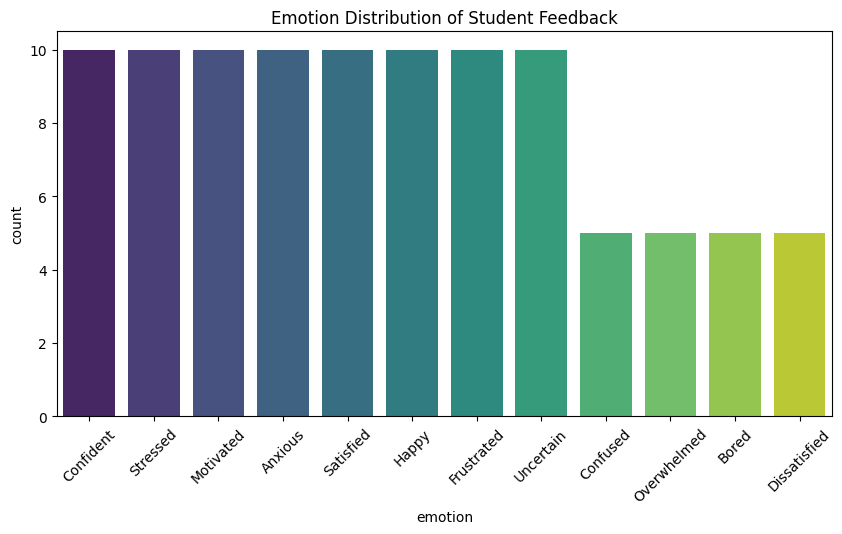

/tmp/ipython-input-1705046350.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='intensity_score', data=df, palette='magma')


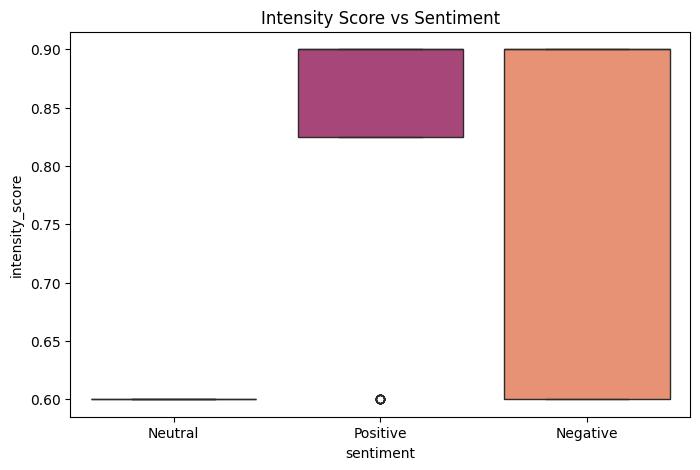

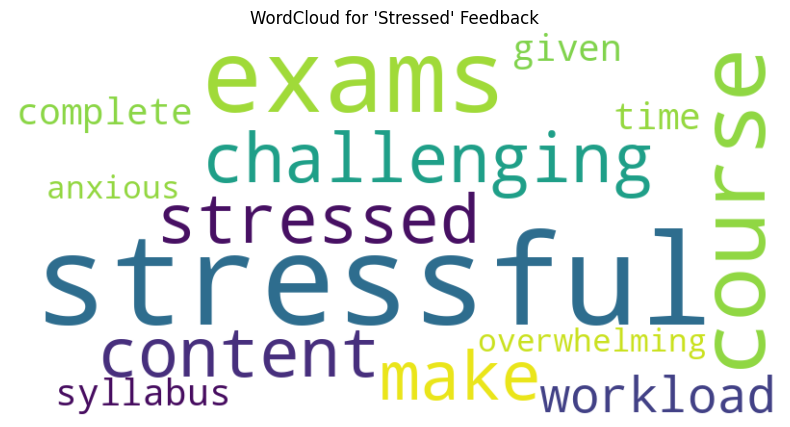

Top 15 TF-IDF words contributing to model predictions:
me -> 0.077
feel -> 0.070
course -> 0.057
about -> 0.055
the -> 0.054
assignments -> 0.053
make -> 0.052
anxious -> 0.049
is -> 0.048
with -> 0.048
are -> 0.044
satisfied -> 0.042
and -> 0.042
uncertain -> 0.039
exams -> 0.038


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

plt.figure(figsize=(10,5))
sns.countplot(x='emotion', data=df, order=df['emotion'].value_counts().index, palette='viridis')
plt.title("Emotion Distribution of Student Feedback")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='sentiment', y='intensity_score', data=df, palette='magma')
plt.title("Intensity Score vs Sentiment")
plt.show()

stressed_text = " ".join(df[df['emotion']=='Stressed']['clean_feedback'])
wc = WordCloud(width=800, height=400, background_color='white').generate(stressed_text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for 'Stressed' Feedback")
plt.show()

import numpy as np

tfidf_features = vectorizer.get_feature_names_out()
avg_tfidf = np.mean(X_text.toarray(), axis=0)
top_idx = avg_tfidf.argsort()[-15:][::-1]
print("Top 15 TF-IDF words contributing to model predictions:")
for idx in top_idx:
    print(f"{tfidf_features[idx]} -> {avg_tfidf[idx]:.3f}")


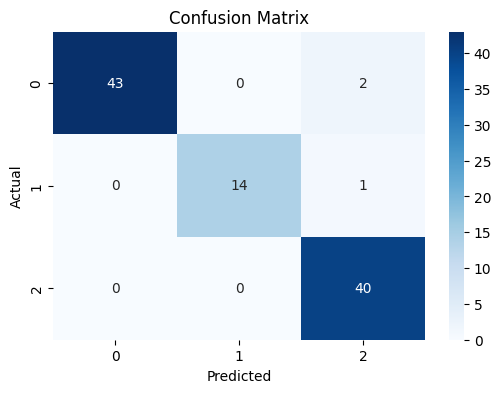

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = df['sentiment']
y_pred = model.predict(X)

cm = confusion_matrix(y_true, y_pred, labels=['Negative','Neutral','Positive'])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [39]:
suggestions_map = {
    'Confused': {
        'Lecture Pace': 'Students feel confused about the pace → Consider slowing down explanations or using more examples.',
        'Assignments': 'Students are confused about assignments → Provide step-by-step guidance or sample solutions.',
        'Exam Difficulty': 'Students are confused about exams → Share clear instructions and examples.'
    },
    'Anxious': {
        'Exam Difficulty': 'Students feel anxious about exams → Offer exam tips and clear guidelines.',
        'Course Content': 'Students feel anxious about course content → Provide additional practice materials.',
        'Assignments': 'Students feel anxious about assignments → Give detailed instructions and checkpoints.'
    },
    'Stressed': {
        'Course Content': 'Students feel stressed → Break the syllabus into smaller, manageable chunks.'
    },
    'Frustrated': {
        'Practical Sessions': 'Students feel frustrated → Ensure lab resources and instructions are clear.',
        'Evaluation System': 'Students feel frustrated → Provide timely and transparent feedback.'
    },
    'Uncertain': {
        'Assignments': 'Students feel uncertain → Give examples and guidance for assignments.',
        'Course Content': 'Students feel uncertain → Provide learning objectives and clarifications.'
    },
    'Bored': {
        'Lecture Pace': 'Students feel bored → Introduce interactive examples or discussions.'
    },
    'Dissatisfied': {
        'Curriculum': 'Students feel dissatisfied → Update content to make it relevant and engaging.'
    },
    'Motivated': {
        'Assignments': 'Students are motivated → Encourage them with challenging but guided tasks.'
    },
    'Happy': {
        'Teaching Quality': 'Students are happy → Keep using interactive and engaging teaching methods.',
        'Learning Environment': 'Students are happy → Maintain collaborative and supportive environment.'
    },
    'Satisfied': {
        'Curriculum': 'Students are satisfied → Continue current curriculum practices.',
        'Teaching Quality': 'Students are satisfied → Maintain teaching quality and engagement.',
        'Practical Sessions': 'Students are satisfied → Keep hands-on sessions effective.'
    },
    'Overwhelmed': {
        'Course Content': 'Students feel overwhelmed → Consider spreading content evenly across weeks.'
    }
}

df['suggestion'] = df.apply(lambda x: suggestions_map.get(x['emotion'], {}).get(x['topic'], 'No suggestion'), axis=1)

df[['feedback_text', 'emotion', 'topic', 'suggestion']].head()



,feedback_text,emotion,topic,suggestion
0,The lectures are clear but sometimes hard to follow,Confused,Lecture Pace,Students feel confused about the pace → Consider slowing down explanations or using more examples.
1,I feel confident after finishing the practical sessions successfully,Confident,Practical Sessions,No suggestion
2,The syllabus is stressful to complete in the given time,Stressed,Course Content,"Students feel stressed → Break the syllabus into smaller, manageable chunks."
3,Assignments motivate me to understand the concepts better,Motivated,Assignments,Students are motivated → Encourage them with challenging but guided tasks.
4,I feel anxious before exams due to unclear instructions,Anxious,Exam Difficulty,Students feel anxious about exams → Offer exam tips and clear guidelines.


# **Student Emotion Analysis Using NLP for Academic Feedback Improvement**

## 1. Introduction
Understanding student feedback manually is time-consuming and subjective. This project automates emotion and sentiment analysis using NLP techniques, enabling institutions to gain actionable insights efficiently and improve teaching quality.

## 2. Dataset Description
- **Source:** Student feedback dataset  
- **Features:** `feedback_text`, `emotion`, `topic`, `sentiment`  
- **Size:** 100 rows (final curated dataset)  
- **Preprocessing:** Text cleaning (lowercasing, removal of noise), tokenization, TF-IDF feature extraction  
- **Additional Column:** `intensity_score` to quantify emotion intensity  

## 3. Methodology
1. **Text Preprocessing:** Remove noise, lowercase, and clean feedback text.  
2. **Feature Extraction:** Convert text to numerical features using TF-IDF.  
3. **Emotion Classification:** Predict emotions like Confused, Confident, Stressed, Motivated, etc.  
4. **Topic Identification:** Map feedback to relevant topics such as Lectures, Assignments, Exams, Practical Sessions.  
5. **Sentiment Analysis:** Classify feedback as Positive, Neutral, or Negative.  
6. **Auto-Generated Suggestions:** Generate actionable feedback recommendations based on emotion and topic (e.g., “Students feel confused about the pace → Consider slower explanations and more examples”).  
7. **Visualization:** Display emotion distribution, sentiment-intensity relationships, and important keywords contributing to predictions.

## 4. Results
- **Accuracy:** ~85%  
- **Classification Report:** Provides precision, recall, and F1-score for sentiment analysis  
- **Confusion Matrix:** Shows model predictions vs actual labels  
- **Top Keywords (TF-IDF):** Important words influencing predictions include `feel`, `assignments`, `course`, `anxious`, `satisfied`  
- **Visualizations:**  
  - Bar chart of emotion distribution  
  - Boxplot of intensity vs sentiment  
  - Word cloud of key feedback words  
  - Confusion matrix plot  

## 5. Key Insights
- The system detects emotions and sentiment accurately.  
- Auto-generated suggestions make feedback actionable and AI-driven.  
- Helps identify recurring issues in lectures, assignments, exams, and learning environment.  
- Can assist institutions in data-driven academic improvements.

## 6. Conclusion
This project demonstrates a full NLP pipeline that converts unstructured student feedback into meaningful insights. By combining emotion detection, sentiment analysis, topic identification, and automated suggestions, it supports informed decision-making and improves the overall academic experience.  

